In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import nltk
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64

Article Counts per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64
Some dates could not be parsed. Check for NaT values:
         Unnamed: 0                                           headline  \
10               10    30 Stocks Moving in Friday's Pre-Market Session   
11               11  SVB Leerink Maintains Outperform on Agilent Te...   
12               12  8 Stocks Moving In Thursday's After-Hours Session   
13               13  Agile

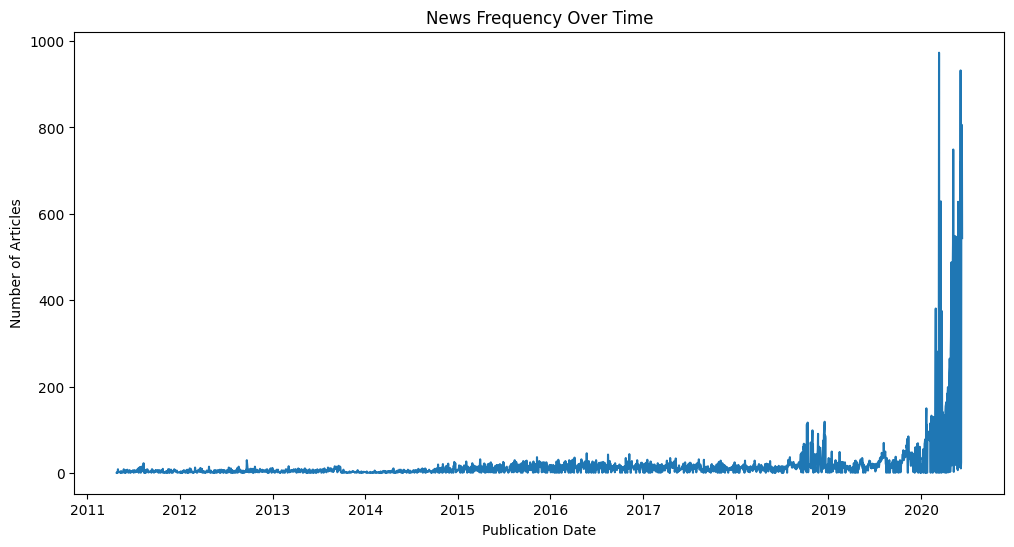

In [3]:


# Load the CSV file
df = pd.read_csv('raw_analyst_ratings.csv')

# Descriptive statistics for textual lengths
print("Headline Length Statistics:")
print(df['headline'].str.len().describe())

# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print("\nArticle Counts per Publisher:")
print(publisher_counts)

# Analyze publication dates
df['date'] = df['date'].str.strip()  # Remove any leading/trailing spaces
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime

# Check for any NaT values resulting from conversion
if df['date'].isnull().any():
    print("Some dates could not be parsed. Check for NaT values:")
    print(df[df['date'].isnull()])

# Proceed with the analysis
print("\nPublication Date Statistics:")
print(df['date'].describe())

# Visualize publication date trends
plt.figure(figsize=(12, 6))
df['date'].groupby(df['date'].dt.date).count().plot()
plt.title('News Frequency Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.show()

In [4]:
# Download NLTK resources if not already done
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tesfaye\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tesfaye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Load the CSV file
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Drop rows with null headlines
df = df.dropna(subset=['headline'])

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['headline'].apply(sia.polarity_scores)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x['compound'] > 0 else 'negative' if x['compound'] < 0 else 'neutral')

print("Sentiment Analysis Results:")
print(df['sentiment'].value_counts())
df


Sentiment Analysis Results:
sentiment
neutral     491850
positive    298174
negative    153660
Name: count, dtype: int64


,Unnamed: 0,headline,url,publisher,date,stock,sentiment_score,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",positive
...,...,...,...,...,...,...,...,...
943679,948487,Omega Flex Reports Q4 EPS $0.44 vs $0.41 In Sa...,https://www.benzinga.com/news/earnings/18/02/1...,Paul Quintaro,2018-02-08 00:00:00,OFLX,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
943680,948488,Omega Flex Reports Q3 EPS $1.11 vs $1.02 In Sa...,https://www.benzinga.com/news/earnings/17/10/1...,Paul Quintaro,2017-10-19 00:00:00,OFLX,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
943681,948489,Mid-Afternoon Market Update: Cintas Rises On E...,https://www.benzinga.com/news/earnings/17/07/9...,Lisa Levin,2017-07-21 00:00:00,OFLX,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",positive
943682,948490,15 Biggest Mid-Day Losers For Friday,https://www.benzinga.com/news/17/07/9806974/15...,Lisa Levin,2017-07-21 00:00:00,OFLX,"{'neg': 0.405, 'neu': 0.595, 'pos': 0.0, 'comp...",negative


In [6]:
## Identify common keywords or phrases
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['headline'])
word_freq = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'frequency': np.asarray(X.sum(axis=0)).ravel().tolist()})
print(word_freq.nlargest(columns='frequency', n=10))

            word  frequency
104259        vs     162099
93662     stocks     161776
40857        est     140604
40388        eps     128897
63981     market     120558
89240     shares     114313
83568    reports     108710
101800    update      91723
37999   earnings      87399
86676      sales      79645


Some dates could not be parsed. Check for NaT values:
         Unnamed: 0                                           headline  \
10               10    30 Stocks Moving in Friday's Pre-Market Session   
11               11  SVB Leerink Maintains Outperform on Agilent Te...   
12               12  8 Stocks Moving In Thursday's After-Hours Session   
13               13  Agilent Technologies shares are trading higher...   
14               14  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       ur

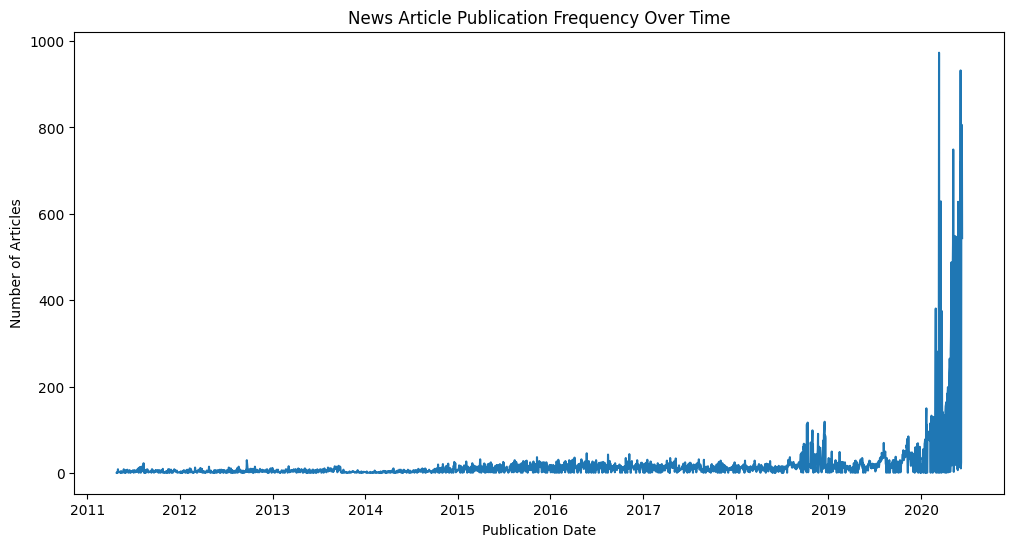

Spikes in Publication Frequency:
2020-02-27: 275 articles
2020-02-28: 381 articles
2020-03-06: 281 articles
2020-03-11: 282 articles
2020-03-12: 973 articles
2020-03-19: 629 articles
2020-03-23: 375 articles
2020-03-24: 160 articles
2020-04-09: 164 articles
2020-04-13: 184 articles
2020-04-15: 186 articles
2020-04-16: 199 articles
2020-04-17: 194 articles
2020-04-20: 180 articles
2020-04-21: 233 articles
2020-04-22: 245 articles
2020-04-23: 265 articles
2020-04-24: 246 articles
2020-04-27: 283 articles
2020-04-28: 317 articles
2020-04-29: 449 articles
2020-04-30: 488 articles
2020-05-01: 385 articles
2020-05-04: 347 articles
2020-05-05: 478 articles
2020-05-06: 531 articles
2020-05-07: 749 articles
2020-05-08: 508 articles
2020-05-11: 485 articles
2020-05-12: 387 articles
2020-05-13: 549 articles
2020-05-14: 536 articles
2020-05-15: 322 articles
2020-05-18: 547 articles
2020-05-19: 332 articles
2020-05-20: 461 articles
2020-05-21: 333 articles
2020-05-22: 286 articles
2020-05-26: 628 a

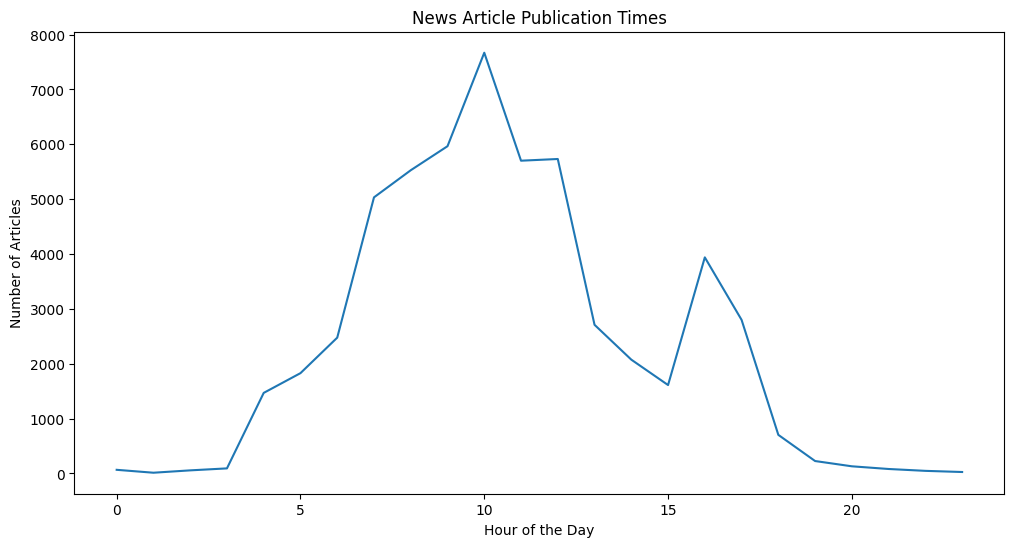

In [13]:
# Load the CSV file
df = pd.read_csv('raw_analyst_ratings.csv')

# Convert publication_date column to datetime
df['date'] = df['date'].str.strip()  # Remove any leading/trailing spaces
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime

# Check for any NaT values resulting from conversion
if df['date'].isnull().any():
    print("Some dates could not be parsed. Check for NaT values:")
    print(df[df['date'].isnull()])

# Analyze publication frequency over time
df['publication_date_daily'] = df['date'].dt.date
daily_counts = df.groupby('publication_date_daily').size()

# Plot the publication frequency over time
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('News Article Publication Frequency Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.show()

# Identify spikes in publication frequency
spike_threshold = daily_counts.mean() + 2 * daily_counts.std()
spikes = daily_counts[daily_counts > spike_threshold]

print("Spikes in Publication Frequency:")
for date, count in spikes.items():
    print(f"{date}: {count} articles")

# Analyze publication times
df['publication_hour'] = df['date'].dt.hour
hourly_counts = df.groupby('publication_hour').size()

# Plot the publication times
plt.figure(figsize=(12, 6))
hourly_counts.plot()
plt.title('News Article Publication Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.show()

In [21]:
# Load the CSV file
df = pd.read_csv('raw_analyst_ratings.csv')

# Analyze publishers
publishers = df['publisher'].str.lower()

# Count the number of articles per publisher
publisher_counts = dict(publishers.value_counts())

# Sort the publishers by the number of articles
sorted_publishers = sorted(publisher_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 publishers
print("Top 10 Publishers:")
for publisher, count in sorted_publishers[:10]:
    print(f"{publisher}: {count} articles")

# Analyze publisher domains
publisher_domains = publishers.str.extract(r'@(\w+\.\w+)', expand=False)
domain_counts = dict(publisher_domains.value_counts())

# Sort the domains by the number of articles
sorted_domains = sorted(domain_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 domains
print("\nTop 10 Publisher Domains:")
for domain, count in sorted_domains[:10]:
    print(f"{domain}: {count} articles")



Top 10 Publishers:
paul quintaro: 228373 articles
lisa levin: 186979 articles
benzinga newsdesk: 150484 articles
charles gross: 96732 articles
monica gerson: 82380 articles
eddie staley: 57254 articles
hal lindon: 49047 articles
etf professor: 28489 articles
juan lopez: 28438 articles
benzinga staff: 28114 articles

Top 10 Publisher Domains:
benzinga.com: 7937 articles
gmail.com: 139 articles
andyswan.com: 5 articles
investdiva.com: 2 articles
tothetick.com: 2 articles
eosdetroit.io: 1 articles
forextraininggroup.com: 1 articles
stockmetrix.net: 1 articles


In [7]:
# Load the CSV file
df = pd.read_csv('raw_analyst_ratings.csv')

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [8]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display the top publishers
print("Top Publishers by Article Count:")
print(publisher_counts.head(10))

# Check the number of articles by stock
stock_counts = df['stock'].value_counts()
print("\nArticles by Stock:")
print(stock_counts)

Top Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

Articles by Stock:
stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
DWM        1
DWAT       1
DVP        1
DXJS       1
DXJR       1
Name: count, Length: 6204, dtype: int64


In [9]:
# Extract unique domains from email addresses
df['domain'] = df['publisher'].str.split('@').str[-1]

# Count the number of articles per domain
domain_counts = df['domain'].value_counts()

# Display the top domains
print("\nTop Domains by Article Count:")
print(domain_counts.head(10))


Top Domains by Article Count:
domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


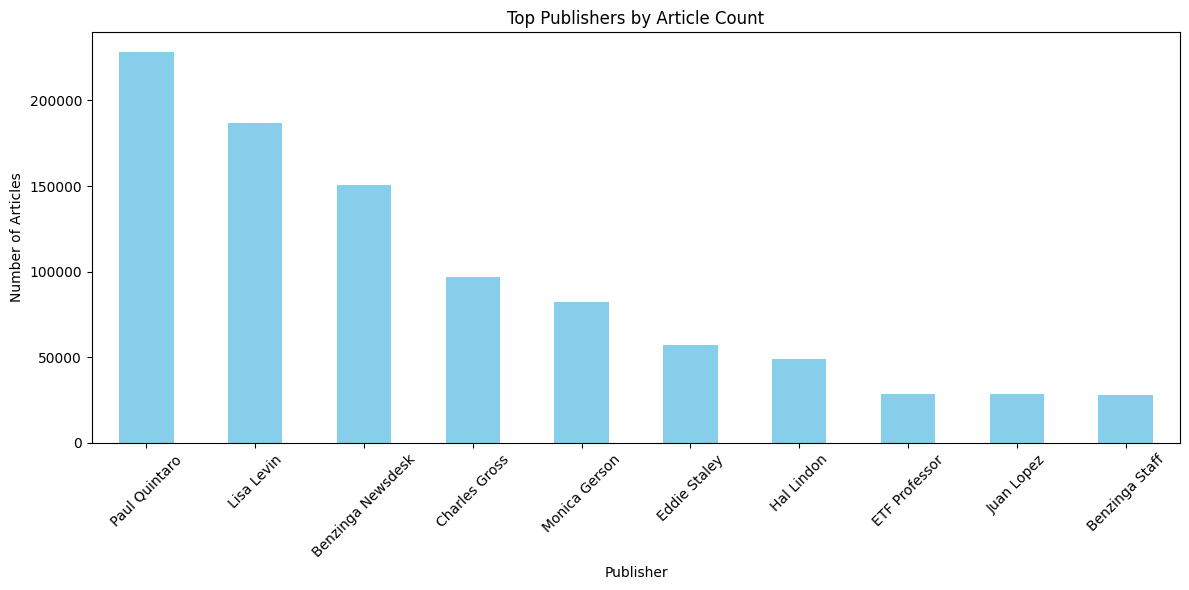

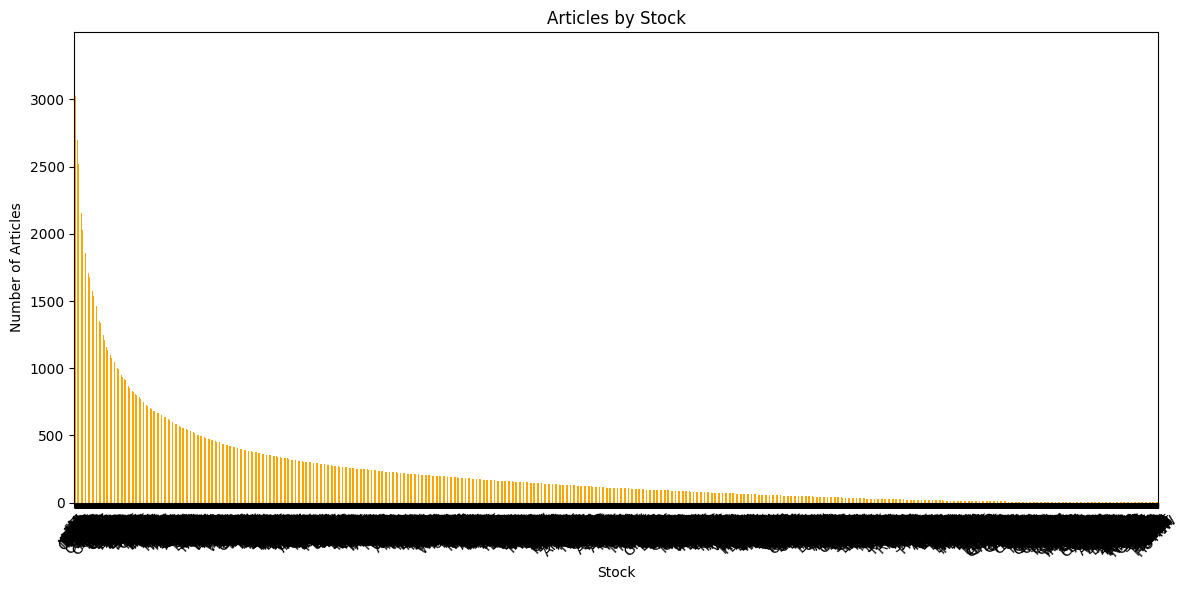

In [10]:
# Plotting top publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting articles by stock
plt.figure(figsize=(12, 6))
stock_counts.plot(kind='bar', color='orange')
plt.title('Articles by Stock')
plt.xlabel('Stock')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
#corelation analysis
# Load the news articles and stock prices CSV files
head=pd.read_csv('../data/raw_analyst_ratings.csv')
headlines=df['headline']
stock_df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')  # Replace with your stock price file

np.random.seed(0)

# Create a DataFrame with dates from the AAPL data
dates = stock_df.index
text_data = pd.DataFrame(dates, columns=['Date'])
text_data['Headline'] = np.random.choice(headlines, size=len(text_data))

# Display the first few rows of the updated DataFrame
text_data.head()


,Date,Headline
0,0,Jefferies & Company Reports on Canadian Solar
1,1,Express Scripts Shares Moving Higher As Anthem...
2,2,UPDATE: Avon Products Announces Select Coty Fr...
3,3,50 Stocks Moving In Thursday's Mid-Day Session
4,4,Noble Energy Announces Production Share Contra...


In [7]:
from textblob import TextBlob
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Applying the sentiment analysis function to your headlines
text_data['Sentiment'] = text_data['Headline'].apply(calculate_sentiment)

In [8]:
combined_data = text_data.set_index('Date').join(stock_df['Close'])
combined_data.head()

,Headline,Sentiment,Close
Date,,,
0,Jefferies & Company Reports on Canadian Solar,0.00,0.128348
1,Express Scripts Shares Moving Higher As Anthem...,0.25,0.121652
2,UPDATE: Avon Products Announces Select Coty Fr...,0.00,0.112723
3,50 Stocks Moving In Thursday's Mid-Day Session,0.00,0.115513
4,Noble Energy Announces Production Share Contra...,0.60,0.118862


In [9]:
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

In [10]:
correlation = combined_data['Sentiment'].corr(combined_data['Daily Returns'])
print("Correlation between sentiment and daily stock returns:", correlation)

Correlation between sentiment and daily stock returns: 0.010920302247194483


In [11]:
correlation = combined_data['Sentiment'].corr(combined_data['Close'])
print("Correlation between sentiment and closing:", correlation)

Correlation between sentiment and closing: -0.006276288691133068


In [18]:
correlation = df['publisher'].value_counts().corr(df['publisher'].value_counts())
print("Correlation between Publisher and Number of Articles:", correlation)

Correlation between Publisher and Number of Articles: 1.0


In [20]:
## Analyze the publication dates
df['date'] = df['date'].str.strip()  # Remove any leading/trailing spaces
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for any NaT values resulting from conversion
if df['date'].isnull().any():
    print("Some dates could not be parsed. Check for NaT values:")
    print(df[df['date'].isnull()])
df['day_of_week'] = df['date'].dt.day_name()
day_counts = df['day_of_week'].value_counts()

print(day_counts)

Some dates could not be parsed. Check for NaT values:
         Unnamed: 0                                           headline  \
10               10    30 Stocks Moving in Friday's Pre-Market Session   
11               11  SVB Leerink Maintains Outperform on Agilent Te...   
12               12  8 Stocks Moving In Thursday's After-Hours Session   
13               13  Agilent Technologies shares are trading higher...   
14               14  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       ur

In [21]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6

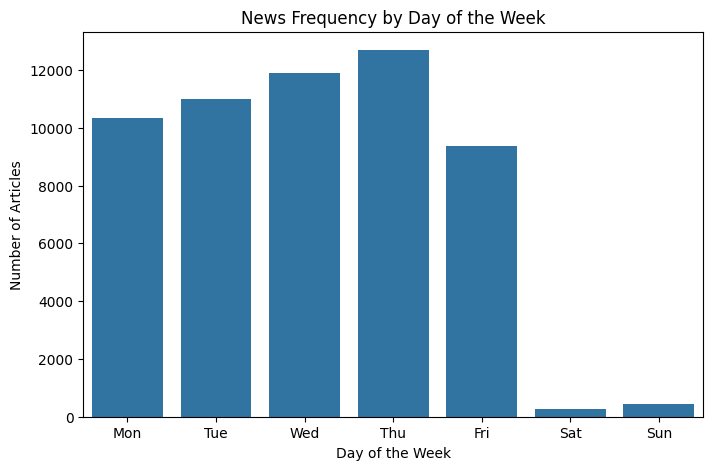

In [24]:
import seaborn as sns# type: ignore
day_counts = df.groupby('day_of_week')['headline'].count()

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.title('News Frequency by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

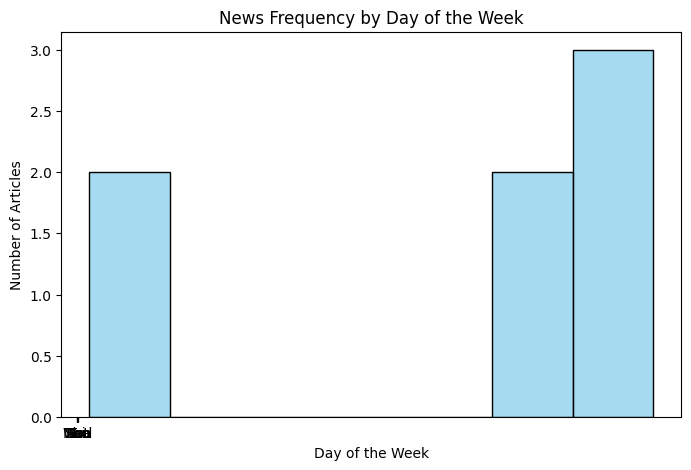

In [25]:
# Group by day of the week and count articles
day_counts = df.groupby('day_of_week')['headline'].count()

# Create a histogram
plt.figure(figsize=(8, 5))
sns.histplot(day_counts, bins=7, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.title('News Frequency by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()